### Importing Libraries

In [39]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading Data through pandas

In [50]:
df = pd.read_csv("perceptron_toydata.txt",delimiter='\t')
df.head()

,0.77,-1.14,0
0,-0.33,1.44,0
1,0.91,-3.07,0
2,-0.37,-1.91,0
3,-1.84,-1.13,0
4,-1.50,0.34,0


### Converting datafreame to numpy arrays then to Tensor

In [75]:
arr = df.to_numpy()
tensor = torch.tensor(arr,dtype = torch.float64)

### Splittig Dataset into X and y (where X stands for features and y stands for tag) 

In [167]:
X = tensor[:,:2]
y = tensor[:,2]
y = y.to(torch.int64)

### Shuffling Indexes

In [429]:
shuffled_idx = np.arange(y.shape[0])
rng = np.random.RandomState(111)
rng.shuffle(shuffled_idx)
shuffled_idx_tensor = torch.tensor(shuffled_idx,dtype=torch.uint32)
X = X[shuffled_idx]
y = y[shuffled_idx]

### Spliiting Dataset into Training and Test dataset

In [431]:
X_train,X_test = X[:70],X[70:]
y_train,y_test = y[:70],y[70:]

### Normalizing dataset

In [433]:
mean,std = torch.mean(X_train),torch.std(X_train)
X_train = (X_train-mean)/std
X_test = (X_test-mean)/std

### Plotting Training data

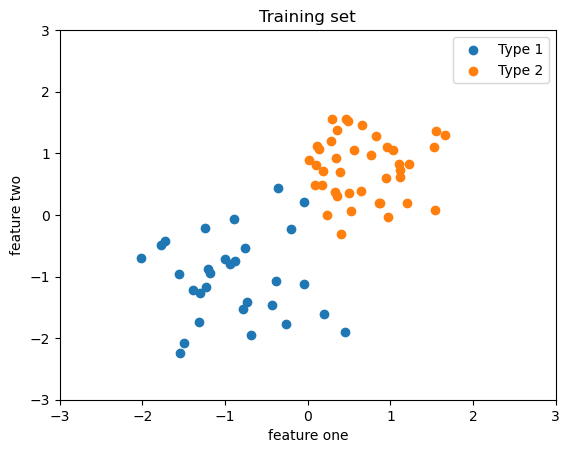

In [478]:
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],label='Type 1')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],label='Type 2')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend()
plt.title("Training set")
plt.xlabel("feature one")
plt.ylabel("feature two")
plt.show()

### Plotting Test Data

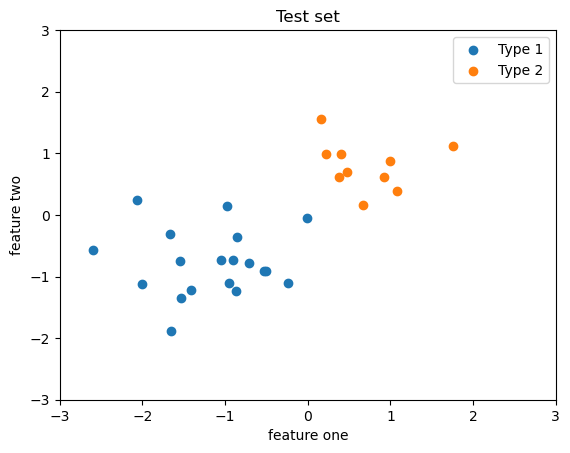

In [480]:
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1],label='Type 1')
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1],label='Type 2')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend()
plt.title("Test set")
plt.xlabel("feature one")
plt.ylabel("feature two")
plt.show()

### Main Perceptron Algorithm Class

In [437]:
class Perceptron():
    def __init__(self,num_features):
        self.num_features = num_features
        self.weights = torch.zeros((num_features,1),dtype=torch.float64)
        self.bias = torch.zeros(1,dtype= torch.float64)
        self.ones = torch.tensor(1.0, dtype=torch.float64)
        self.zeros = torch.tensor(0.0, dtype=torch.float64)
        
    def forward(self,x):
        sum = torch.add(torch.mm(x,self.weights), self.bias)
        predictions = torch.where(sum>0.,self.ones,self.zeros)
        return predictions

    def backward(self,x,y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors

    def train(self,x,y,epochs):
        for e in range(epochs):
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1,self.num_features),y[i]).reshape(-1)
                self.weights += (errors*x[i]).reshape(self.num_features,1)
                self.bias += errors

    def evaluate(self,x,y):
        predictions = self.forward(x).reshape(-1)
        accuracy = torch.sum(predictions==y).float()/y.shape[0]
        return accuracy*100       

### Training Perceptron algorithm

In [438]:
ppn = Perceptron(2)
ppn.train(X_train,y_train,epochs = 5)
print(f"Weights are : {ppn.weights}")
print(f"Bias is : {ppn.bias}")

Weights are : tensor([[2.8476],
        [0.9583]], dtype=torch.float64)
Bias is : tensor([0.], dtype=torch.float64)


### Evaluting Perceptron ALgorithm on Training data

In [439]:
print(f"Accuracy is {ppn.evaluate(X_train,y_train)}")

Accuracy is 98.57142639160156


### Evaluting Perceptron ALgorithm on Test data

In [496]:
print(f"Accuracy is {ppn.evaluate(X_test,y_test)}")

Accuracy is 100.0


### Plotting Decision Boundary 

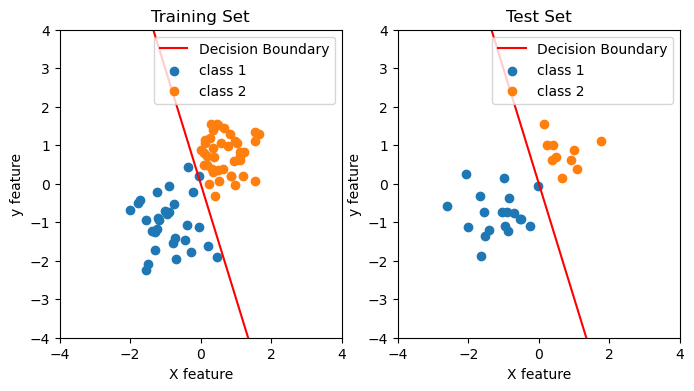

In [447]:
w1,w2 = ppn.weights.reshape(-1)
b = ppn.bias.reshape(-1)
x1 = np.linspace(-3,3,100)
x2 = -(w1/w2) * x1 - (b/w2)
fig,ax = plt.subplots(1,2,sharex = True,figsize=(8,4))
ax[0].plot(x1,x2,label="Decision Boundary",color='red')
ax[1].plot(x1,x2,label="Decision Boundary",color='red')
ax[0].scatter(X_train[y_train==0,0],X_train[y_train==0,1],label = "class 1")
ax[0].scatter(X_train[y_train==1,0],X_train[y_train==1,1],label = "class 2")
ax[1].scatter(X_test[y_test==0,0],X_test[y_test==0,1],label = "class 1")
ax[1].scatter(X_test[y_test==1,0],X_test[y_test==1,1],label = "class 2")
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")
ax[0].set_title("Training Set")
ax[1].set_title("Test Set")
ax[0].set_xlim([-4,4])
ax[0].set_ylim([-4,4])
ax[1].set_xlim([-4,4])
ax[1].set_ylim([-4,4])
ax[0].set_xlabel("X feature")
ax[0].set_ylabel("y feature")
ax[1].set_xlabel("X feature")
ax[1].set_ylabel("y feature")
plt.show()